In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "survey_2018.csv"

In [3]:
df = pd.read_csv(file)
df.head()

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,Other.3,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?,Start Date (UTC),Submit Date (UTC),Network ID
0,e44a0a34f2465940beda2a1537e9b99e,0,More than 1000,1.0,0.0,Yes,Yes,Yes,Yes,Yes,...,Female,Canada,NaN,NaN,NaN,Canada,NaN,2018-12-29 23:46:38,2018-12-30 00:00:03,4bbb884ccc
1,0d698e3beca20fb75f19b9d528e36d73,0,More than 1000,1.0,1.0,Yes,Yes,No,I don't know,I don't know,...,male,United States of America,Massachusetts,White,NaN,United States of America,Massachusetts,2018-12-27 21:40:40,2018-12-27 21:45:45,275e7543bd
2,61a40c9071eb36fa9caa254d31500c41,0,6-25,0.0,1.0,Yes,Yes,No,No,I don't know,...,Male,United States of America,Florida,White,NaN,United States of America,Florida,2018-12-21 17:37:43,2018-12-21 18:08:01,43994c3dba
3,f8624340bead7deb08abb766704ddf6b,0,6-25,1.0,1.0,No,No,No,No,I don't know,...,male,Norway,NaN,NaN,NaN,Norway,NaN,2018-12-21 16:37:56,2018-12-21 16:44:44,907b3a3faa
4,31d3ae93b68d79e504a0a643601b6b1e,0,26-100,1.0,1.0,Yes,Yes,Yes,Yes,Yes,...,Ostensibly Male,United States of America,Tennessee,White,NaN,United States of America,Tennessee,2018-12-20 19:39:02,2018-12-20 20:58:34,26df20fea3


In [4]:
df_reduced = df.loc[:, ["What US state or territory do you <strong>work</strong> in?", "What country do you <strong>work</strong> in?", "What is your gender?", "What is your age?", "Overall, how well do you think the tech industry supports employees with mental health issues?", "Would you bring up your mental health with a potential employer in an interview?", "Would you be willing to bring up a physical health issue with a potential employer in an interview?", "If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when</strong> <em><strong>NOT</strong></em><strong> being treated effectively (i.e., when you are experiencing symptoms)?</strong>", "If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>", "Do you have a family history of mental illness?", "Have you ever sought treatment for a mental health disorder from a mental health professional?", "Have you ever been diagnosed with a mental health disorder?", "Overall, how much importance did your previous employer place on mental health?", "Did you ever discuss your mental health with a previous coworker(s)?", "Overall, how much importance does your employer place on mental health?", "How many employees does your company or organization have?"]]
df_reduced.head()

,What US state or territory do you <strong>work</strong> in?,What country do you <strong>work</strong> in?,What is your gender?,What is your age?,"Overall, how well do you think the tech industry supports employees with mental health issues?",Would you bring up your mental health with a potential employer in an interview?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,"If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when</strong> <em><strong>NOT</strong></em><strong> being treated effectively (i.e., when you are experiencing symptoms)?</strong>","If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>",Do you have a family history of mental illness?,Have you ever sought treatment for a mental health disorder from a mental health professional?,Have you ever been diagnosed with a mental health disorder?,"Overall, how much importance did your previous employer place on mental health?",Did you ever discuss your mental health with a previous coworker(s)?,"Overall, how much importance does your employer place on mental health?",How many employees does your company or organization have?
0,NaN,Canada,Female,57,2,No,No,Sometimes,Rarely,Yes,1,NaN,2.0,0.0,6.0,More than 1000
1,Massachusetts,United States of America,male,29,3,No,Yes,Often,Sometimes,Yes,1,Yes,NaN,NaN,3.0,More than 1000
2,Florida,United States of America,Male,46,3,No,No,Not applicable to me,Not applicable to me,Yes,0,NaN,1.0,0.0,1.0,6-25
3,NaN,Norway,male,34,1,No,No,Not applicable to me,Not applicable to me,No,0,NaN,8.0,0.0,8.0,6-25
4,Tennessee,United States of America,Ostensibly Male,29,4,Yes,Yes,Sometimes,Rarely,Yes,1,Yes,0.0,1.0,5.0,26-100


In [5]:
df_reduced["What is your age?"].median()

34.0

In [6]:
prod_not_treated = df_reduced["If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when</strong> <em><strong>NOT</strong></em><strong> being treated effectively (i.e., when you are experiencing symptoms)?</strong>"].value_counts()
productivity_not_treated_df = pd.DataFrame(prod_not_treated)
productivity_not_treated_df = productivity_not_treated_df.rename(columns={"If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when</strong> <em><strong>NOT</strong></em><strong> being treated effectively (i.e., when you are experiencing symptoms)?</strong>" : "While NOT Treated Effectively"})

productivity_not_treated_df

,While NOT Treated Effectively
Often,186
Not applicable to me,134
Sometimes,79
Rarely,17
Never,1


In [7]:
prod_treated = df_reduced["If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>"].value_counts()
productivity_treated_df = pd.DataFrame(prod_treated)
productivity_treated_df = productivity_treated_df.rename(columns={"If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>" : "While Treated Effectively"})
productivity_treated_df

,While Treated Effectively
Not applicable to me,153
Rarely,112
Sometimes,105
Often,32
Never,15


In [8]:
productivity_df = productivity_not_treated_df.merge(productivity_treated_df, left_index=True, right_index=True)
productivity_df = productivity_df.drop("Not applicable to me")
productivity_df

,While NOT Treated Effectively,While Treated Effectively
Often,186,32
Sometimes,79,105
Rarely,17,112
Never,1,15


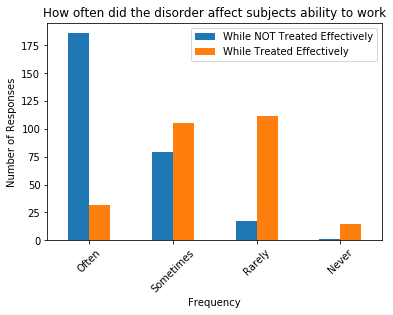

In [9]:
productivity_df.plot(kind="bar", rot=45 )
plt.title("How often did the disorder affect subjects ability to work")
plt.xlabel("Frequency")
plt.ylabel("Number of Responses")

plt.savefig('Productivity.png')

In [10]:
disorder_file = "Anxiety_Disorder.csv"
disorders = pd.read_csv(disorder_file)
disorders.head()

,"Anxiety Disorder (Generalized, Social, Phobia, etc)","Mood Disorder (Depression, Bipolar Disorder, etc)","Psychotic Disorder (Schizophrenia, Schizoaffective, etc)","Eating Disorder (Anorexia, Bulimia, etc)",Attention Deficit Hyperactivity Disorder,"Personality Disorder (Borderline, Antisocial, Paranoid, etc)",Obsessive-Compulsive Disorder,Post-traumatic Stress Disorder,Stress Response Syndromes,Dissociative Disorder,Substance Use Disorder,Addictive Disorder
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Anxiety Disorder (Generalized, Social, Phobia,...","Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,NaN,NaN,NaN,NaN,Post-traumatic Stress Disorder,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Anxiety Disorder (Generalized, Social, Phobia,...","Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,NaN,Attention Deficit Hyperactivity Disorder,"Personality Disorder (Borderline, Antisocial, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

disorders_df = pd.DataFrame(disorders)

disorders_df

,"Anxiety Disorder (Generalized, Social, Phobia, etc)","Mood Disorder (Depression, Bipolar Disorder, etc)","Psychotic Disorder (Schizophrenia, Schizoaffective, etc)","Eating Disorder (Anorexia, Bulimia, etc)",Attention Deficit Hyperactivity Disorder,"Personality Disorder (Borderline, Antisocial, Paranoid, etc)",Obsessive-Compulsive Disorder,Post-traumatic Stress Disorder,Stress Response Syndromes,Dissociative Disorder,Substance Use Disorder,Addictive Disorder
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Anxiety Disorder (Generalized, Social, Phobia,...","Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,NaN,NaN,NaN,NaN,Post-traumatic Stress Disorder,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Anxiety Disorder (Generalized, Social, Phobia,...","Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,NaN,Attention Deficit Hyperactivity Disorder,"Personality Disorder (Borderline, Antisocial, ...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,NaN,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,NaN,NaN,"Personality Disorder (Borderline, Antisocial, ...",NaN,NaN,NaN,NaN,NaN,NaN
414,NaN,"Mood Disorder (Depression, Bipolar Disorder, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
disorders_df = pd.DataFrame(disorders_df.count())

In [13]:
disorders_df = disorders_df.rename(columns={0 : 'Qty'})

disorders_df = disorders_df.sort_values(by=['Qty'], ascending=False)
disorders_df

,Qty
"Mood Disorder (Depression, Bipolar Disorder, etc)",145
"Anxiety Disorder (Generalized, Social, Phobia, etc)",125
Attention Deficit Hyperactivity Disorder,56
Post-traumatic Stress Disorder,20
"Eating Disorder (Anorexia, Bulimia, etc)",13
Obsessive-Compulsive Disorder,12
Substance Use Disorder,10
"Personality Disorder (Borderline, Antisocial, Paranoid, etc)",8
Addictive Disorder,7
"Psychotic Disorder (Schizophrenia, Schizoaffective, etc)",3


In [14]:
disorders_df.loc["Other"] = disorders_df.iloc[8:12].sum()
disorders_df

,Qty
"Mood Disorder (Depression, Bipolar Disorder, etc)",145
"Anxiety Disorder (Generalized, Social, Phobia, etc)",125
Attention Deficit Hyperactivity Disorder,56
Post-traumatic Stress Disorder,20
"Eating Disorder (Anorexia, Bulimia, etc)",13
Obsessive-Compulsive Disorder,12
Substance Use Disorder,10
"Personality Disorder (Borderline, Antisocial, Paranoid, etc)",8
Addictive Disorder,7
"Psychotic Disorder (Schizophrenia, Schizoaffective, etc)",3


In [15]:
disorders_df = disorders_df.drop(['Dissociative Disorder', 'Stress Response Syndromes', 'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)', 'Addictive Disorder'])
disorders_df

,Qty
"Mood Disorder (Depression, Bipolar Disorder, etc)",145
"Anxiety Disorder (Generalized, Social, Phobia, etc)",125
Attention Deficit Hyperactivity Disorder,56
Post-traumatic Stress Disorder,20
"Eating Disorder (Anorexia, Bulimia, etc)",13
Obsessive-Compulsive Disorder,12
Substance Use Disorder,10
"Personality Disorder (Borderline, Antisocial, Paranoid, etc)",8
Other,15


In [16]:
disorders_df = disorders_df.rename(index={
    "Anxiety Disorder (Generalized, Social, Phobia, etc)" : "Anxiety Dis",
    "Mood Disorder (Depression, Bipolar Disorder, etc)" : "Mood Dis (Depression, Bipolar)",
    "Attention Deficit Hyperactivity Disorder" : "ADHD",
    "Post-traumatic Stress Disorder" : "PTSD",
    "Eating Disorder (Anorexia, Bulimia, etc)" : "Eating Dis",
    "Obsessive-Compulsive Disorder" : "OCD",
    "Substance Use Disorder" : "Substance Use Dis",
    "Personality Disorder (Borderline, Antisocial, Paranoid, etc)" : "Personality Dis"
    
})

In [17]:
keys = disorders_df.keys()
keys

Index(['Qty'], dtype='object')

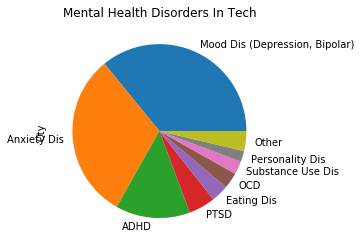

In [18]:
disorders_df.plot(kind='pie', y=keys)
plt.legend().remove()
plt.title("Mental Health Disorders In Tech")
plt.savefig('disorder_pie.png')

In [19]:
# Rating of employers on Mental Health Attention
file17 = "survey_2017.csv"
df17 = pd.read_csv(file17)

file16 = "survey_2016.csv"
df16 = pd.read_csv(file16)

file19 = "survey_2019.csv"
df19 = pd.read_csv(file19)

file14 = "survey_2014.csv"
df14 = pd.read_csv(file14)

In [24]:
rating18 = df["Overall, how much importance did your previous employer place on mental health?"]
rating17 = df17["Overall, how much importance did your previous employer place on mental health?"]
rating19 = df19["Overall, how much importance did your previous employer place on mental health?"]
rating_df = pd.DataFrame({
    "Rating 2017" : rating17,
    "Rating 2018" : rating18,
    "Rating 2019" : rating19
})
rating_mean = rating_df.mean()
rating_mean_df = pd.DataFrame(rating_mean)
rating_mean_df = rating_mean_df.rename(columns={0: 'Mean Mental Rating'}, index={'Rating 2017': '2017', 'Rating 2018': '2018', 'Rating 2019': '2019'})
rating_mean_df.reset_index(level=0, inplace=True)
rating_mean_df

,index,Mean Mental Rating
0,2017,3.497751
1,2018,3.358127
2,2019,3.527027


In [26]:
phys_rating18 = df["Overall, how much importance did your previous employer place on physical health?"]
phys_rating17 = df17["Overall, how much importance did your previous employer place on physical health?"]
phys_rating19 = df19["Overall, how much importance did your previous employer place on physical health?"].astype(float)
phys_rating_df = pd.DataFrame({
    "Rating 2017" : phys_rating17,
    "Rating 2018" : phys_rating18,
    "Rating 2019" : phys_rating19
})
phys_rating_mean = phys_rating_df.mean()
phys_rating_mean_df = pd.DataFrame(phys_rating_mean)
phys_rating_mean_df = phys_rating_mean_df.rename(columns={0: 'Mean Physical Rating'}, index={'Rating 2017': '2017', 'Rating 2018': '2018', 'Rating 2019': '2019'})
phys_rating_mean_df.reset_index(level=0, inplace=True)
phys_rating_mean_df

,index,Mean Physical Rating
0,2017,5.388306
1,2018,5.247934
2,2019,5.587838


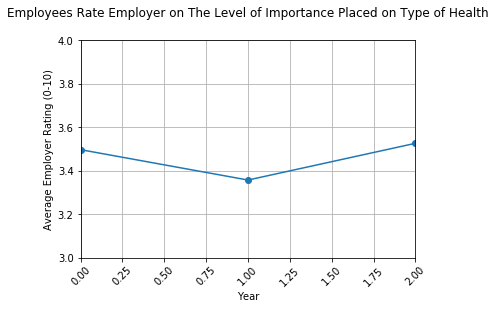

In [47]:
rating_mean_df.plot(kind='line',ylim=(3, 4), grid=True, rot=45, legend=False, marker='o' )
plt.title('Employees Rate Employer on The Level of Importance Placed on Type of Health',  y=1.08)
plt.ylabel('Average Employer Rating (0-10)')
plt.xlabel('Year')
plt.savefig('mental_health_importance.png')


In [28]:

merge_rating = rating_mean_df.merge(phys_rating_mean_df, how='left', on='index')
merge_rating

,index,Mean Mental Rating,Mean Physical Rating
0,2017,3.497751,5.388306
1,2018,3.358127,5.247934
2,2019,3.527027,5.587838


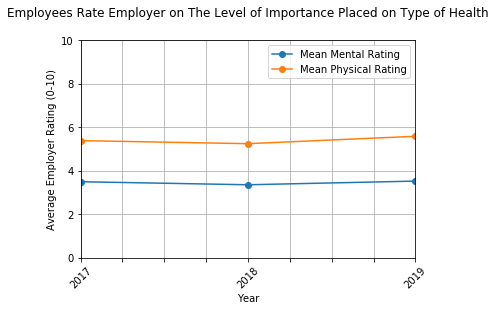

In [45]:
merge_rating.plot(x='index', y=['Mean Mental Rating', 'Mean Physical Rating'], ylim=(0,10), kind='line', grid=True, rot=45, marker='o')
plt.title('Employees Rate Employer on The Level of Importance Placed on Type of Health',  y=1.08)
plt.ylabel('Average Employer Rating (0-10)')
plt.xlabel('Year')
plt.savefig('mean_rating_combo.png')

In [29]:
mh17 = df17["Do you know the options for mental health care available under your employer-provided health coverage?"]
mh18 = df["Do you know the options for mental health care available under your employer-provided health coverage?"]
mh19 = df19["Do you know the options for mental health care available under your employer-provided health coverage?"]
mh_df = pd.DataFrame({
    "2017" : mh17,
    "2018" : mh18,
    "2019" : mh19
})
mh_df.replace(('Yes', 'No'), (1, 0), inplace=True)
mh_mean_df = pd.DataFrame(mh_df.mean())
mh_mean_df = mh_mean_df.rename(columns={0: 'Mean Values'})
mh_mean_df

,Mean Values
2017,0.465278
2018,0.506173
2019,0.467626


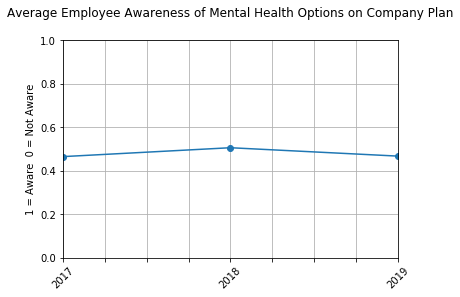

In [46]:
mh_mean_df.plot(kind='line', ylim=(0, 1), grid=True, rot=45, legend=False, marker='o' )
plt.title('Average Employee Awareness of Mental Health Options on Company Plan', y=1.08)
plt.ylabel('1 = Aware  0 = Not Aware')
plt.savefig('mh_coverage_awareness.png')
